In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\ankit\Downloads\ds_stocks.csv",encoding='latin-1')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-12,265.880005,265.940002,252.039993,253.669998,251.241440,35868500
1,2022-07-13,250.190002,253.550003,248.110001,252.720001,250.300552,29497400
2,2022-07-14,250.570007,255.139999,245.940002,254.080002,251.647537,25102800
3,2022-07-15,255.720001,260.369995,254.770004,256.720001,254.262253,29774100
4,2022-07-18,259.750000,260.839996,253.300003,254.250000,251.815872,20975000
...,...,...,...,...,...,...,...
247,2023-07-06,337.299988,342.989990,335.500000,341.269989,341.269989,28161200
248,2023-07-07,339.320007,341.790009,337.000000,337.220001,337.220001,21185300
249,2023-07-10,334.600006,335.230011,327.589996,331.829987,331.829987,32791400
250,2023-07-11,331.059998,332.859985,327.000000,332.470001,332.470001,26698200


In [2]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2022-07-12,253.669998
1,2022-07-13,252.720001
2,2022-07-14,254.080002
3,2022-07-15,256.720001
4,2022-07-18,254.250000
...,...,...
247,2023-07-06,341.269989
248,2023-07-07,337.220001
249,2023-07-10,331.829987
250,2023-07-11,332.470001


In [3]:
df['Date']

0      2022-07-12
1      2022-07-13
2      2022-07-14
3      2022-07-15
4      2022-07-18
          ...    
247    2023-07-06
248    2023-07-07
249    2023-07-10
250    2023-07-11
251    2023-07-12
Name: Date, Length: 252, dtype: object

In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [5]:
df

,Date,Close
0,2022-07-12,253.669998
1,2022-07-13,252.720001
2,2022-07-14,254.080002
3,2022-07-15,256.720001
4,2022-07-18,254.250000
...,...,...
247,2023-07-06,341.269989
248,2023-07-07,337.220001
249,2023-07-10,331.829987
250,2023-07-11,332.470001


In [6]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\ankit\AppData\Local\Temp\ipykernel_20708\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0     2022-07-12
1     2022-07-13
2     2022-07-14
3     2022-07-15
4     2022-07-18
         ...    
247   2023-07-06
248   2023-07-07
249   2023-07-10
250   2023-07-11
251   2023-07-12
Name: Date, Length: 252, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2022-07-12,253.669998
2022-07-13,252.720001
2022-07-14,254.080002
2022-07-15,256.720001
2022-07-18,254.250000
...,...
2023-07-06,341.269989
2023-07-07,337.220001
2023-07-10,331.829987


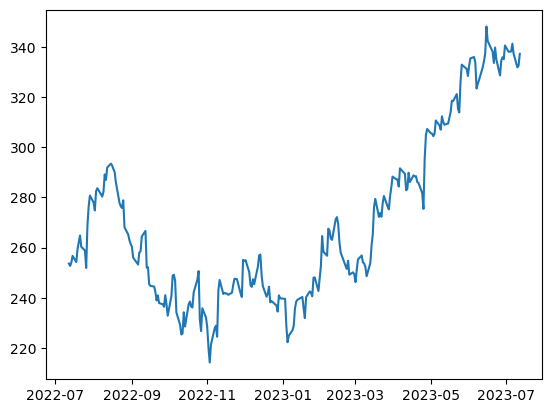

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np
import pandas as pd
import datetime

def str_to_datetime(date_str):
    return datetime.datetime.strptime(date_str, "%Y-%m-%d")

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=7):
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)

    target_date = first_date

    dates = []
    X, Y = [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n + 1)

        if len(df_subset) != n + 1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date + datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X = np.array(X)
    for i in range(0, n):
        ret_df[f'Target-{n-i}'] = X[:, i]

    ret_df['Target'] = Y

    return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2022-07-21', 
                                '2023-07-10', 
                                n=7)
windowed_df


,Target Date,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2022-07-21,253.669998,252.720001,254.080002,256.720001,254.250000,259.529999,262.269989,264.839996
1,2022-07-22,252.720001,254.080002,256.720001,254.250000,259.529999,262.269989,264.839996,260.359985
2,2022-07-25,254.080002,256.720001,254.250000,259.529999,262.269989,264.839996,260.359985,258.829987
3,2022-07-26,256.720001,254.250000,259.529999,262.269989,264.839996,260.359985,258.829987,251.899994
4,2022-07-27,254.250000,259.529999,262.269989,264.839996,260.359985,258.829987,251.899994,268.739990
...,...,...,...,...,...,...,...,...,...
238,2023-07-03,339.709991,335.019989,328.600006,334.570007,335.850006,335.049988,340.540009,337.989990
239,2023-07-05,335.019989,328.600006,334.570007,335.850006,335.049988,340.540009,337.989990,338.149994
240,2023-07-06,328.600006,334.570007,335.850006,335.049988,340.540009,337.989990,338.149994,341.269989
241,2023-07-07,334.570007,335.850006,335.049988,340.540009,337.989990,338.149994,341.269989,337.220001


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((243,), (243, 7, 1), (243,))

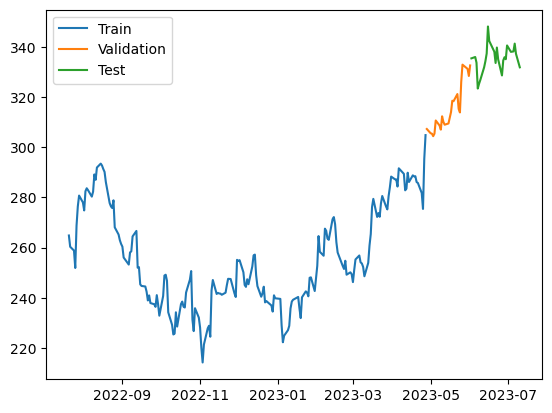

In [11]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))

# Reshape data before scaling
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val_scaled = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1)).reshape(-1)
y_val_scaled = scaler.transform(y_val.reshape(-1, 1)).reshape(-1)
y_test_scaled = scaler.transform(y_test.reshape(-1, 1)).reshape(-1)


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    LSTM(64, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


C:\Users\ankit\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 7, 64)               │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,571 (201.45 KB)

 Trainable params: 51,571 (201.45 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the model
history = model.fit(
    X_train_scaled, y_train_scaled, 
    validation_data=(X_val_scaled, y_val_scaled), 
    epochs=20, 
    batch_size=16, 
    verbose=1
)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.1214 - val_loss: 0.0080
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0209 - val_loss: 0.1350
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0168 - val_loss: 0.0334
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0113 - val_loss: 0.0368
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0113 - val_loss: 0.0230
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0100 - val_loss: 0.0083
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0094 - val_loss: 0.0147
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0105 - val_loss: 0.0075
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095 - val_loss: 0.0224
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0100 - val_loss: 0.0039
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095 - val_loss: 0.0204
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0099 - val_l

In [15]:
# Evaluate on the test set
test_loss = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f'Test Loss: {test_loss}')


Test Loss: 0.0064727868884801865


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


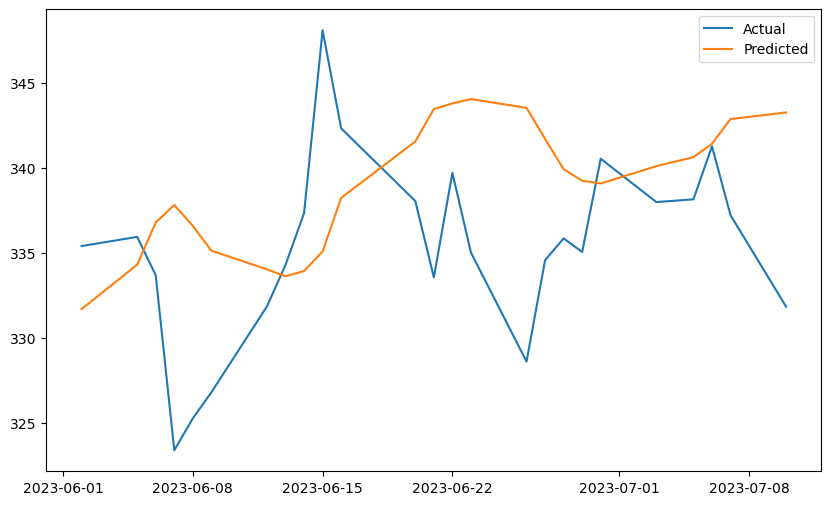

In [16]:
# Make predictions
predictions = model.predict(X_test_scaled)

# Inverse transform the predictions and actual values to get them back to the original scale
predictions = scaler.inverse_transform(predictions)
y_test_scaled = y_test_scaled.reshape(-1, 1)
y_test_inverse = scaler.inverse_transform(y_test_scaled)

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(dates_test, y_test_inverse, label='Actual')
plt.plot(dates_test, predictions, label='Predicted')
plt.legend()
plt.show()
